# Lesson 12
# Execution Control with Loops

Loops are a fundamental construct of execution control. Loops are a way of controlling repetition of code, i.e.,
allow the same piece of code to run multiple times. 

Two repetion structures in Python are `for` loops and `while` loops. 

`for` loops run a set number of times.  In a typical application, a block of code needs to be applied to the elements of a list or an array or list one at a time.    The number of repetitions of the code is determined in advance. 

`while` loops run as long as a specific logical condition is true. The key difference between `while` and `for` loops is that *the number of repetitions in a while loop is unknown* 

While loops make it easy to make code blocks repeat, they are **very slow to execute**  

In [1]:
import numpy as np 
from numpy import random
from matplotlib import pyplot as plt
#Lets start the random number generator
rng = random.default_rng(seed = 9876)


## While Loops

A `while` loop is a type of loop that runs as long as a *logical condition* is **True**. When the logical condition becomes **False**, the loop stops running. The general form of a while loop in Python is below:

    while logical_statement: 
        do this
        and that
        and that 
        AND DO SOMETHING THAT POSSIBLY CHANGES THE STATE OF THE LOGICAL STATEMENT



### Example 1: while with variables

In [2]:
i = 0   #since i is in the logical statement, it must be set to an initial value 
while i<4:  # this is the conditional statement which controls execution
    print(i)
    i = i+1 #this is a critical line, as it updates the value of i


0
1
2
3


### There are three critical pieces to the while loop.  
* First, the variable(s) that will be used in the logical statement must be initialized to some value.  
* Second, a while statement performs execution control based on a logical statement being true.  
* Third, inside the while loop, the variable(s) used in the logical statement must be updated to new values 

### CRITICAL STEP IN WHILE LOOPS

When making use of a `while` loop it is critical that there always be a line inside the while loop that updates whatever is being tested by the logical statement. 

If that line is missing, the while loop will become an **infinite** loop and the code will only stop by an act of ***VIOLENCE*** by you against either your jupyter notebook server, or in a worst case, against your computer (hard reboot).  

### Example 2

Sometimes, its easy to just use a Boolean Indicator variable to control the while loop. 

This can be useful if the conditions that end the while loop are complex. 

Here I rewrite the loop above with an indicator variable. 

In [3]:
i = 0
keep_looping = True
while keep_looping:
    print(i)
    i = i+1
    if i >= 4:
        keep_looping = False


0
1
2
3


### Example 3.  When will I have a thousand dollars? 

Suppose you have 100 dollars.  You put in the bank, and each year they give you 2.5% interest (compounded annually).  How many years will it take for you to have more than 1000 dollars. 

Disclaimer: I am fully aware of the compound interest formula.  Just bear with me here.  

In [5]:
baseline = 100 
interest = 0.04
target = 1000
balance = baseline
years = 0 
while balance <= target:
    balance = balance + interest*balance #this is what happens on Dec 31!
    years = years + 1 
print('Balance is', balance)    
print('Number of years is ', years)    

Balance is 1011.5026353896955
Number of years is  59


What is the answer to the question? In terms of the code? 

years! 

### Example 4.  Sum of Random Numbers to a Limit. 

This example shows a classical type of problem we might solve with a while loop where we are adding values to a counter to a limit.  







In [11]:
limit = 20  #set the limit 
total = 0  #start at 0
nsamples = 0 #start a counter to keep track of the number of samples
mean_normal = 4 #mean of the normal distribution
std_normal = 1 #standard deviation of the normal distribution
while total < limit:
    sample = rng.normal(mean_normal,std_normal,1) #get one random number from a normal distribution
    total = total + sample  # this updates the value of total 
    nsamples = nsamples + 1 # this keeps track of the number of samples taken
print('total = ',total)
print('nsamples = ',nsamples)


total =  [21.67870813]
nsamples =  5


I could save a bit more information from this loop, by actually saving out the running values of total on each step.  

In [15]:
limit = 20  #set the limit 
total = 0  #start at 0
totallist = list()
nsamples = 0 #start a counter to keep track of the number of samples
mean_normal = 4 #mean of the normal distribution
std_normal = 1 #standard deviation of the normal distribution
while total < limit:
    sample = rng.normal(mean_normal,std_normal,1) #get one random number from a normal distribution
    total = total + sample  # this updates the value of total 
    nsamples = nsamples + 1 # this keeps track of the number of samples taken
    totallist.append(total) # I append the current value of total to the list.  
print('total = ',total)
print('nsamples = ',nsamples)
print('totallist = ', totallist)

total =  [20.58047018]
nsamples =  5
totallist =  [array([4.09164865]), array([7.58420183]), array([11.59942756]), array([16.42756523]), array([20.58047018])]


In [13]:
totallist = np.array((totallist))  #clean it up into a numpy array
print(totallist)

[[ 4.27283009]
 [ 8.62358204]
 [12.9395554 ]
 [17.0804688 ]
 [22.36665024]]


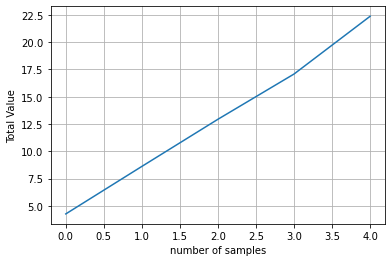

In [14]:
plt.plot(totallist)  # i use the quick an dirty way to make a plot here
plt.xlabel('number of samples')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()


## For Loop 

A `for` loop is a repetition structure where a code block runs a specified number of times.

    for var in therange:
        do this
        and this 
        and this 
    
therange can be given in many forms.  The most common way is the `range` command, but it can also be a **list** or a numpy **array** or even a **string**.

The most important difference between a for loop and while loop is that a for loop **automatically increments the value of var to the next element in therange** in each repetition of the code block

As we will see in the examples below var is often used as an index variable that indexes into arrays sequentially. 

### Example 4  Using the Range Function

In [16]:
for i in range(3):
    print(i)

0
1
2


### Range function 

Python's `range` function can be customized by supplying up to three arguments. The general format of the range function is below:

    range(start,stop,step)
    
*start*, *stop*, *step* must be **integers**


In [17]:
print(range(0,6,2))

range(0, 6, 2)


In [21]:
list(range(0,6,2))

[0, 2, 4]

In [22]:
for i in range(0,6,2):
    print(i)

0
2
4


Can I use numpy's arange? 

In [23]:
for i in np.arange(0,6,2):
    print(i)

0
2
4


Keep this in mind if you need to step in fractions. But usually we will work with range.  

In [24]:
for i in np.arange(0,2,0.25):
    print(i)

0.0
0.25
0.5
0.75
1.0
1.25
1.5
1.75


### Example 5 Projecting your bank account in 5 years 

Suppose you have $500 in your bank account and interest rate is 6.0\% compounded annually. Write a for loop that will compute how much you will have in 5 years. 

In [27]:
n = 5 # number of years
interest = 0.06 # interest rate 
balance = 500 # starting balance
for year in range(n):
    balance = balance+interest*balance
print('Balance of ', balance, 'after ', n, 'years')
    

Balance of  669.1127887999999 after  5 years


What if interest rate varies over the five years? So that the interest rate for each of the five years is is [6\%, 5\%,4\%,4\%,5\%]

In [29]:
#n = 5 # number of years
interest = np.array([0.06,0.05,0.04,0.04,0.05]) # interest rate 
n = len(interest) # I determined the number of years from the lenght of int
balance = 500 # starting balance
for year in range(n):
    print(interest[year])
    balance = balance+interest[year]*balance #notice that I use year here as an index into int
print('Balance of ', balance, 'after ', n, 'years')
    

0.06
0.05
0.04
0.04
0.05
Balance of  632.00592 after  5 years


What if I want to keep track of what is happening to my balance each year and make a graph? 

Balance of  1603.5677361064218 after  20 years


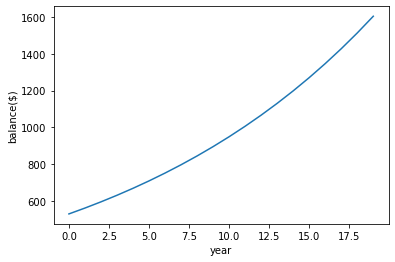

In [32]:
n = 20 # number of years
interest = 0.06 # interest rate 
balance = 500 # starting balance
balance_by_year = np.zeros(n)
for year in range(n):
    balance = balance+interest*balance
    balance_by_year[year] = balance #Here I use year as an index into the output array 
print('Balance of ', balance, 'after ', n, 'years')

plt.plot(range(n),balance_by_year)
plt.xlabel('year')
plt.ylabel('balance($)')
plt.show()

In [33]:
balance_by_year[0]

530.0

The first value in the graph right now is NOT the starting balance.  Can I rewrite the code to include that? 

Balance of  1603.5677361064218 after  20 years


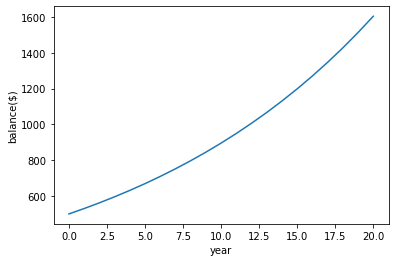

In [35]:
n = 20 # number of years
interest = 0.06 # interest rate 
balance = 500 # starting balance
balance_by_year = np.zeros(n + 1) #notice I added 1 more here. 
balance_by_year[0] = balance # set the first value to the starting balance
for year in range(n):
    balance = balance+interest*balance
    balance_by_year[year + 1] = balance #Here I make the index year + 1. This is because i am using 0 for the starting balance
print('Balance of ', balance, 'after ', n, 'years')

plt.plot(range(n+1),balance_by_year)
plt.xlabel('year')
plt.ylabel('balance($)')
plt.show()

### Example 6.  Removing the mean from each row of a data matrix

In performing data analysis, we often have to remove the mean of a row (or column) of a data matrix. To do this, we could make good use of a for loop. 


In [36]:
data = rng.normal(6,1,(10,20)) # I generated some random data from normal with mean of 6 and standard deviation of 1
meandata = np.mean(data,axis =1) # computed the mean 
print(meandata)

[5.95894562 6.31132702 6.03317458 5.79054021 6.12547683 6.0819017
 5.46925037 5.76636364 6.16962641 5.89591928]


In [37]:
print(data[0,:])


[6.61532804 5.93712864 4.8103844  6.28674823 5.35418472 6.20879998
 7.80029302 6.14269745 6.43511304 4.7190716  6.78379761 6.0552635
 6.04540489 6.80049739 6.00421456 5.52618762 5.29139922 4.69753747
 5.59012407 6.07473692]


In [40]:
for j in range(10): #loop over the rows
    data[j,:] = data[j,:]-meandata[j] #remove the mean from each row
meandata = np.mean(data,axis = 1)
print(meandata)

[ 3.95516953e-17  1.11022302e-17  5.55111512e-18 -2.77555756e-17
 -4.44089210e-17  8.32667268e-17  9.97465999e-18  2.49800181e-17
  2.84494650e-17  0.00000000e+00]


In [39]:
print(data[0,:])

[ 0.65638242 -0.02181697 -1.14856122  0.32780261 -0.6047609   0.24985436
  1.8413474   0.18375183  0.47616742 -1.23987402  0.82485199  0.09631788
  0.08645927  0.84155178  0.04526894 -0.432758   -0.66754639 -1.26140815
 -0.36882155  0.1157913 ]
